# Understanding When Classifiers Make Mistakes

This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur with updates by Ross Beveridge

Last Update 3/31/2022

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*


In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Measuring classifier accuracy

There is more to measuring classifier accuracy than using the standard accuracy measure defiend as the fraction of examples that are classified correctly.  There are many situations in which this is not the right way of measuring accuracy.  One example is when dealing with data that is imbalanced, ie. when one class has many more examples than the other.

## The confusion matrix

Before introducing additional measures of accuracy we will explore the **confusion matrix**.  We will do so using the iris dataset:

In [47]:
from sklearn import datasets
iris = datasets.load_iris()
X=iris.data
y=iris.target
print(X.shape, y.shape)

(150, 4) (150,)


In [48]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We will use a nearest neighbor classifier for obtaining predictions:

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict

classifier = KNeighborsClassifier(n_neighbors=1)

y_pred = cross_val_predict(classifier, X, y, cv=5)
np.mean(y==y_pred)

0.96

### Definition of the confusion matrix

Rows of the confusion matrix correspond to the true labels, while columns correspond to the predicted labels.
The elements of the matrix in a given row quantify how predictions are distributed across the different classes.
More formally, element $i, j$ in the matrix is the number of examples from class $i$ predicted to be in class $j$.
As its name suggests, it tells us where the classifiers tends to be confused.
Using the k-nearest neighbors classifier we obtain the following confusion matrix for our predictions on the iris dataset:


In [50]:
from sklearn.metrics import confusion_matrix
print (iris.target_names)
matrix = confusion_matrix(y, y_pred)
print (matrix)

['setosa' 'versicolor' 'virginica']
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


Scikit-learn has a function for making nicer visualization of the confusion matrix:

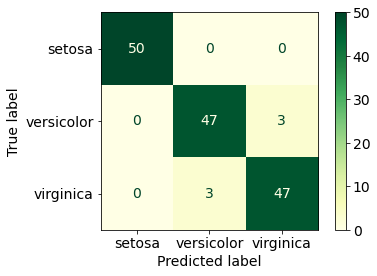

In [51]:
from sklearn.metrics._plot import confusion_matrix as cm

plt.rcParams.update({'font.size': 14})

disp=cm.ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=iris.target_names)
fig, ax = plt.subplots(figsize=(6,4))
disp.plot(ax=ax, include_values=True, cmap=plt.cm.YlGn);

Here, we used  "unofficial" scikit-learn functionality for plotting the confusion matrix.  Their "official" (i.e. documented method) is [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html).  This method takes in a classifier and a test set.  It then generates the predictions for the test set and plots the resulting confusion matrix.  It thus precludes plotting predictions generated using cross-validation.

Note that scikit-learn uses a convention that is different than other sources for labeling the axes of the confusion matrix (see e.g. the [wikipedia article on the confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)).

## Question

How do you compute the accuracy of the classifier from the confusion matrix?

## What Gets Confused with What

The confusion matrix provides more information than accuracy:  for this dataset it tells us that the classifier has some difficulty distinguishing between iris-versicolor and iris-virginica, while iris-setosa is perfectly distinguishable from the other two classes.
This makes sense in view of the following visualization of the data that demonstrates the overlap between iris-versicolor and iris-virginica:

In [52]:
def scatter_with_legend(X, y, ax, class_names) :
    colors = ['ob', 'or', 'oc']
    for c in range(len(class_names)):
        idx = (y==c)
        ax.plot(X[idx,0], X[idx,1], colors[c], 
                label = class_names[c], alpha=0.5)
    ax.legend()

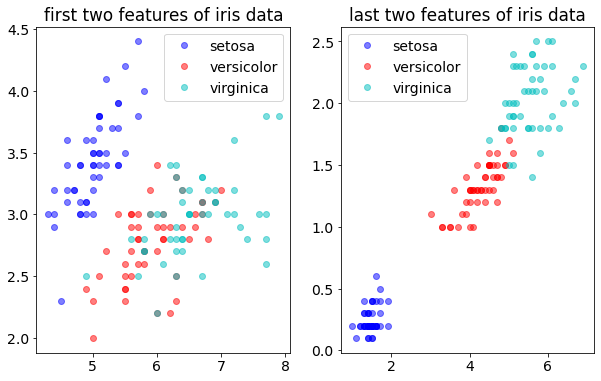

In [53]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
scatter_with_legend(X[:,[0, 1]], y, ax1, iris.target_names)
scatter_with_legend(X[:,[2, 3]], y, ax2, iris.target_names)
ax1.set_title('first two features of iris data')
ax2.set_title('last two features of iris data') ;

## The confusion matrix for binary classification problems

For binary classification problems we have special terminology that we will present next.
First, we will take a look at a confusion matrix for a binary classification problem:

In [54]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = data.data
y = data.target
print('number of examples ', len(y))
print('number of features ', len(X[0]))
print(data.target_names)

number of examples  569
number of features  30
['malignant' 'benign']


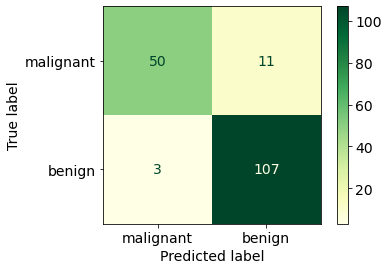

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

classifier = KNeighborsClassifier(n_neighbors=3)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)

plt.rcParams.update({'font.size': 14})
disp=cm.ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=data.target_names)
fig, ax = plt.subplots(figsize=(6,4))
disp.plot(ax=ax, include_values=True, cmap=plt.cm.YlGn);

In the case of a binary classification problem the entries in the confusion matrix have names:

| True / Predicted | positive            | negative            |
| :--------------- |:------------------- | :------------------ |
| **positive**     | true positive (TP)  | false negative (FN) |
| **negative**     | false positive (FP) | true negative (TN)  |


Let's define $\mathrm{P} = \mathrm{TP} + \mathrm{FN}$ and $\mathrm{N} = \mathrm{FP} + \mathrm{TN}$.
In terms of the entries of the confusion matrix we can define additional measures of accuracy that are commonly used in machine learning:

**Recall** (true positive rate):

$$
\mathrm {recall} =\frac {\mathrm {TP} }{\mathrm {P} }
=\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN} }
$$

Recall tells us what fraction of the positive examples our classifier is able to classify correctly.
The true negative rate, or specifcity is defined analogously as $\mathrm{TN} / \mathrm{N}$.

**Precision:**

$$
 \mathrm {precision} =\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FP} }
$$

Precision tells us how accurate are the positive predictions, i.e. when the classifier makes a positive prediction, how likely it is to be correct.

**Accuracy**:

$$
\mathrm{accuracy}= 
\frac{\mathrm{TP} + \mathrm{TN}}{\mathrm{P + N}}
$$


**Balanced accuracy** is the mean of recall (true positive rate) and specificity (true negative rate):

$$
\mathrm{balanced-accuracy}= 
\frac{1}{2}\left( \frac{\mathrm{TP}}{\mathrm{P}} + \frac{\mathrm{TN}}{\mathrm{N}}  \right)
$$

Earlier in the course we pointed out that the standard measure of accuracy is not a good indication of  success for data that is imbalanced.  In particular, we have seen that the majority classifier has very high accuracy for imbalanced data.  Balanced accuracy addresses this shortcoming.

The **F1 score** is the harmonic mean of precision and recall:

$$
\mathrm {F} _{1}=2\cdot {\frac {\mathrm {precision} \cdot \mathrm {recall} }{\mathrm {precision} +\mathrm {recall} }}
$$

The F1 score is commonly used in the field of information retrieval to measure performance in search, text categorization, and other natural language processing applications.
The F1 score focuses on true positives and does not take into account into account true negatives.  Its focus is on how well a classifier is performing in retrieving relevant items.

### Exercises

* Recall and precision are competing goals.  Give examples of applications where high precision is more important than high recall.  Similarly, think of applications where high recall is more important.
* What is the balanced accuracy of the majority classifier?
* Show that when the data has an equal number of positive and negative examples, balanced accuracy is equal to accuracy.


# Rank Based Retrieval

Modern practice is to often use precision and recall when arguably true positives etc. would be more helpful. That said - the underlying mathematical connection is neither wrong nor improper. However, to develop an intuition for precision and recall it helps a lot to see these measures motivated in their original context of document retrieval. 

Therefore, let us play a bit with ranked based process of seperating positive from negative.  To clarify, many algorithms will compute a score and subsequently rank examples from most to least likely to be a postive example. Then, by taking the top $k$ ranked examples one can ask how well the algorithm behaved.  

In [56]:
def rank_two_class_play_pen (num_p, num_n, noise_level, rseed=42) :
    y_ranked = [1] * num_p + [0] * num_n
    y_label = y_ranked.copy()
    np.random.seed(rseed)
    flipit = np.random.uniform(0,1,len(y_ranked)) < noise_level
    for i in range(len(y_ranked)) :
        if flipit[i] :
            if y_ranked[i] == 1 : 
                y_label[i] = 0
            else :
                y_label[i] = 1
    return y_ranked, y_label

In [63]:
y_true, y = rank_two_class_play_pen(8, 24, 0.1)
# y_true, y = rank_two_class_play_pen(4, 2, 1.0)
for i in range(len(y)) :
    print(f'Rank \t{i} has true label {y_true[i]} and observed is {y[i]}')

Rank 	0 has true label 1 and observed is 1
Rank 	1 has true label 1 and observed is 1
Rank 	2 has true label 1 and observed is 1
Rank 	3 has true label 1 and observed is 1
Rank 	4 has true label 1 and observed is 1
Rank 	5 has true label 1 and observed is 1
Rank 	6 has true label 1 and observed is 0
Rank 	7 has true label 1 and observed is 1
Rank 	8 has true label 0 and observed is 0
Rank 	9 has true label 0 and observed is 0
Rank 	10 has true label 0 and observed is 1
Rank 	11 has true label 0 and observed is 0
Rank 	12 has true label 0 and observed is 0
Rank 	13 has true label 0 and observed is 0
Rank 	14 has true label 0 and observed is 0
Rank 	15 has true label 0 and observed is 0
Rank 	16 has true label 0 and observed is 0
Rank 	17 has true label 0 and observed is 0
Rank 	18 has true label 0 and observed is 0
Rank 	19 has true label 0 and observed is 0
Rank 	20 has true label 0 and observed is 0
Rank 	21 has true label 0 and observed is 0
Rank 	22 has true label 0 and observed is 

## Now Illustrate Precision and Recall

In the next illustration we will play by the following rules.  We will take the labels in order of rank and declare the first $k$ to be positive.  

I want you all to go and look at the [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall) Wikipedia Page. It is well put together and I promise you many practicing ML folks confuse themselves (repeatedly) over these two definitions. 

In [64]:
def calc_precision(y, k, pout=True) :
    if (k == 0) :
        return 1
    else :
        n_retrieved = np.sum(y[0:k])
        if pout : print(f'{n_retrieved} positive examples in top {k}')
        precision = n_retrieved / k
        if pout : print(f'Precision is {precision:.3f}')
        return precision

In [66]:
calc_precision(y, 8)

7 positive examples in top 8
Precision is 0.875


0.875

In [33]:
def calc_recall(y, k, pout=True) :
    if (k == 0) :
        return 0
    else : 
        n_retrieved = np.sum(y[0:k])
        n_positive = np.sum(y)
        if pout : print(f'{n_retrieved} positive examples in top {k}')
        if pout : print(f'{n_positive} positive examples in total')
        recall = n_retrieved / n_positive
        if pout : print(f'Recal is {recall:.3f}')
        return recall    

In [67]:
calc_recall(y, 8)

7 positive examples in top 8
9 positive examples in total
Recal is 0.778


0.7777777777777778

In [68]:
precis_vals = np.array([calc_precision(y, k, pout=False) for k in range(len(y))])
recall_vals = np.array([calc_recall(y, k, pout=False) for k in range(len(y))])
print(f'k \tRecall\tPrecision')
for i in range(0,len(y)) :
    print(f'{i}, \t{recall_vals[i]:.3f}, \t{precis_vals[i]:.3f}')

k 	Recall	Precision
0, 	0.000, 	1.000
1, 	0.111, 	1.000
2, 	0.222, 	1.000
3, 	0.333, 	1.000
4, 	0.444, 	1.000
5, 	0.556, 	1.000
6, 	0.667, 	1.000
7, 	0.667, 	0.857
8, 	0.778, 	0.875
9, 	0.778, 	0.778
10, 	0.778, 	0.700
11, 	0.889, 	0.727
12, 	0.889, 	0.667
13, 	0.889, 	0.615
14, 	0.889, 	0.571
15, 	0.889, 	0.533
16, 	0.889, 	0.500
17, 	0.889, 	0.471
18, 	0.889, 	0.444
19, 	0.889, 	0.421
20, 	0.889, 	0.400
21, 	0.889, 	0.381
22, 	0.889, 	0.364
23, 	0.889, 	0.348
24, 	0.889, 	0.333
25, 	0.889, 	0.320
26, 	0.889, 	0.308
27, 	0.889, 	0.296
28, 	0.889, 	0.286
29, 	0.889, 	0.276
30, 	1.000, 	0.300
31, 	1.000, 	0.290


## Precision Recall Curve

We now have enough context (and code) to illustrate the [Precision Recall Curve](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html). 

A key take away message from this plot is that in many ML contexts - and in particular rank based retreival - where one form of error may be traded off against another. Specifically as shown below, higher precision at the expense of a lower recall.

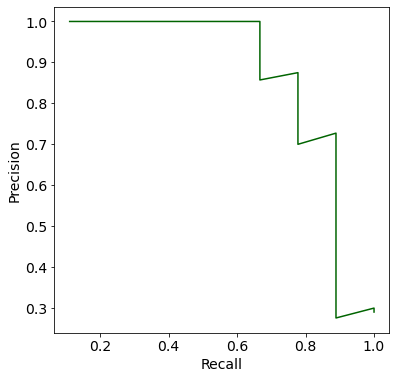

In [36]:
y_true, y = rank_two_class_play_pen(8, 24, 0.1)
# y_true, y = rank_two_class_play_pen(128, 128, 0.2)

precis_vals = np.array([calc_precision(y, k, pout=False) for k in range(1,len(y))])
recall_vals = np.array([calc_recall(y, k, pout=False) for k in range(1,len(y))])
f, ax = plt.subplots(1, 1, figsize=(6,6))
ax.plot(recall_vals,precis_vals,color='darkgreen')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision') ;